In [1]:
import torch

D_1000 = torch.load('1000.pt')
D_1001 = torch.load('1001.pt')

In [15]:
def show(D):
    x_imu = D['x_imu']
    x_s_and_c = D['x_s_and_c']
    y = D['y']

    # print(x_imu[0])
    # print(x_imu.shape)
    
    print(x_s_and_c[0])
    print(x_s_and_c.shape)
    
    print(y[0])
    print(y.shape)


In [16]:
show(D_1000)

tensor([[-0.0719, -0.1751,  0.9961,  ..., -0.0346,  0.0940, -0.0812],
        [-0.0712, -0.1736,  0.9962,  ..., -0.0386,  0.0999, -0.0827],
        [-0.0705, -0.1725,  0.9963,  ..., -0.0373,  0.1009, -0.0851],
        ...,
        [-0.0613, -0.1145,  0.9978,  ..., -0.0396,  0.1097, -0.0878],
        [-0.0603, -0.1147,  0.9978,  ..., -0.0411,  0.1005, -0.0842],
        [-0.0598, -0.1130,  0.9979,  ..., -0.0438,  0.1052, -0.0824]])
torch.Size([1, 40, 131])
tensor([[-0.0215, -0.0806,  0.3161,  ..., -0.0570,  0.0967, -0.1535],
        [-0.0656, -0.1479,  0.9887,  ..., -0.1361,  0.4073, -0.3580],
        [-0.0582, -0.1534,  0.9879,  ..., -0.1488,  0.5519, -0.4090],
        ...,
        [-0.0172, -0.0843,  0.9965,  ..., -0.1937,  0.5531, -0.4292],
        [-0.0126, -0.0840,  0.9963,  ..., -0.2384,  0.5444, -0.4418],
        [-0.0278, -0.0849,  0.9974,  ..., -0.2218,  0.5056, -0.4370]],
       grad_fn=<SelectBackward0>)
torch.Size([1, 40, 131])


In [17]:
show(D_1001)

tensor([[-0.0712, -0.1736,  0.9962,  ..., -0.0386,  0.0999, -0.0827],
        [-0.0705, -0.1725,  0.9963,  ..., -0.0373,  0.1009, -0.0851],
        [-0.0700, -0.1709,  0.9963,  ..., -0.0358,  0.0912, -0.0875],
        ...,
        [-0.0603, -0.1147,  0.9978,  ..., -0.0411,  0.1005, -0.0842],
        [-0.0598, -0.1130,  0.9979,  ..., -0.0438,  0.1052, -0.0824],
        [-0.0599, -0.1099,  0.9979,  ..., -0.0440,  0.1035, -0.0844]])
torch.Size([1, 40, 131])
tensor([[-0.0537, -0.0677,  0.3415,  ..., -0.1531,  0.4993, -0.1856],
        [-0.0614, -0.1301,  1.0268,  ..., -0.2247,  0.5288, -0.4689],
        [-0.0586, -0.1411,  1.0059,  ..., -0.1366,  0.5673, -0.4905],
        ...,
        [-0.0094, -0.0889,  0.9996,  ..., -0.1681,  0.5982, -0.3985],
        [-0.0049, -0.0855,  0.9970,  ..., -0.1595,  0.5299, -0.3822],
        [-0.0157, -0.0906,  0.9962,  ..., -0.1465,  0.5137, -0.3825]],
       grad_fn=<SelectBackward0>)
torch.Size([1, 40, 131])


In [22]:
import json
dataset = open('OpenOrca-Viet.jsonl', encoding='utf-8')
count  = 0
for line in dataset:
    count += 1
    data = json.loads(line)
    print(data)
    break
# print(count)

{'instruction': 'Bạn là một trợ lý hữu ích, người luôn cung cấp lời giải thích. Hãy suy nghĩ như bạn đang trả lời một đứa trẻ năm tuổi.', 'input': 'Tạo một bản tóm tắt ngắn câu này:\n một nhóm người bị lừa đảo trong một kế hoạch ponzi, trong đó các khoản đầu tư của họ được sử dụng để trả tiền lãi hư cấu cho các nhà đầu tư trước đó, đã thua kiện tại tòa án tối cao để chuyển sang đứng đầu trong thủ tục phá sản chống lại một công ty chứng khoán không còn tồn tại.', 'output': 'Rất nhiều người đã bị lừa trong một trò chơi kiếm tiền gọi là kế hoạch Ponzi. Họ muốn là người đầu tiên lấy lại tiền từ một công ty bị phá sản. Nhưng thẩm phán lớn ở tòa án tối cao đã nói không.'}


# Mining

In [2]:
import numpy as np
from scipy.spatial.transform import Rotation


def Rot2Euler(rotation_matrix):
    r = Rotation.from_matrix(rotation_matrix)
    return np.degrees(r.as_euler('xyz'))

In [97]:
from matplotlib import pyplot as plt
def show(data, styles=['-r', '-g', '-b']):
    length = len(data[0])
    values = [ list() for i in range(length) ]
    for d in data:
        for i, v in enumerate(d):
            values[i].append(v)
            
    plt.figure(figsize=(20, 3))
    for value, style in zip(values, styles):
        plt.plot(value, style)
    plt.show()

In [101]:
import pickle
test_file = '..\data\preprocessed_DIP_IMU_v1\dipimu_s_03_01.pkl'
data = pickle.load(open(test_file, "rb"))


start = 0
length = 15000
end = start + length

# imu = data['imu'][start:end]
imu = data['imu']

In [102]:
sensors = [
    {"rot":[], "euler":[], "acc":[]} for i in range(6)
]
for frame in imu:
    rots = frame[:54].reshape((6, 3, 3))
    accs = frame[54:].reshape((6, 3))
    for i in range(6):
        rot = rots[i]
        sensors[i]["rot"].append(rot)
        sensors[i]["euler"].append(Rot2Euler(rot))
        sensors[i]["acc"].append(accs[i])


0


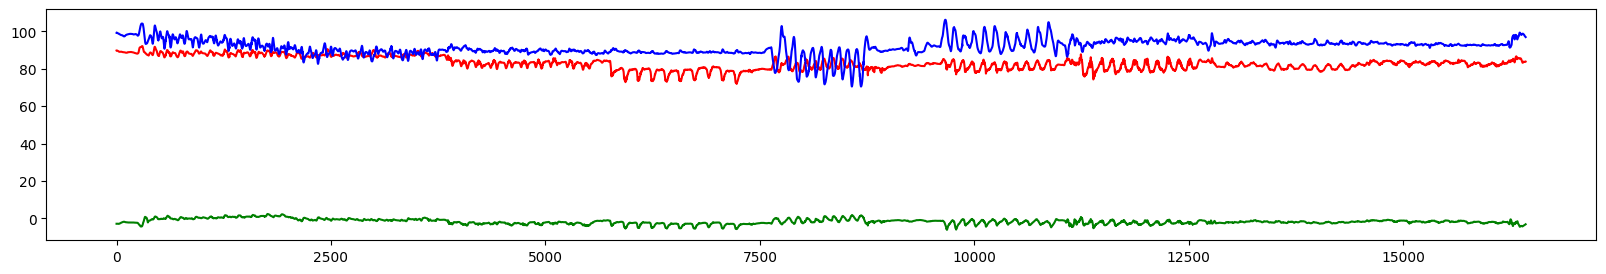

1


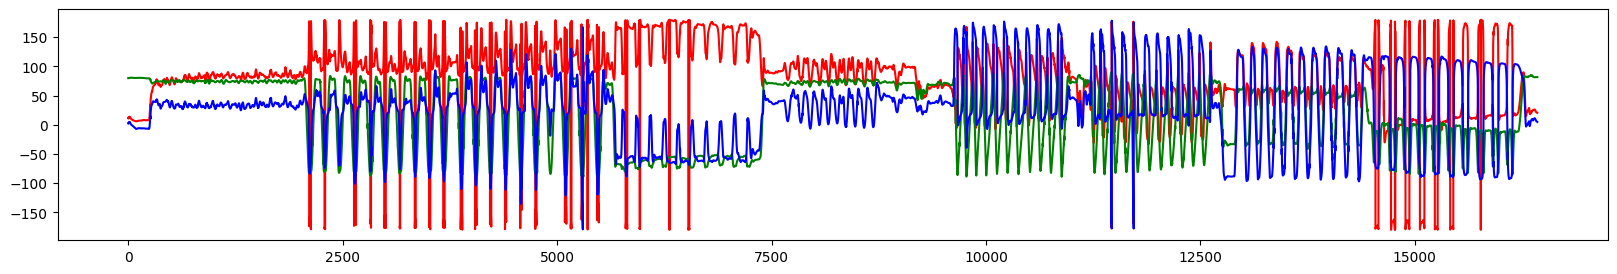

2


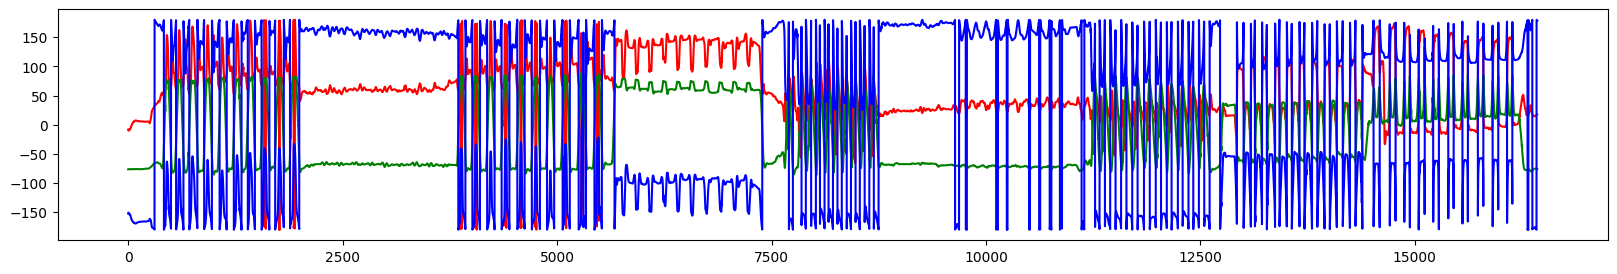

3


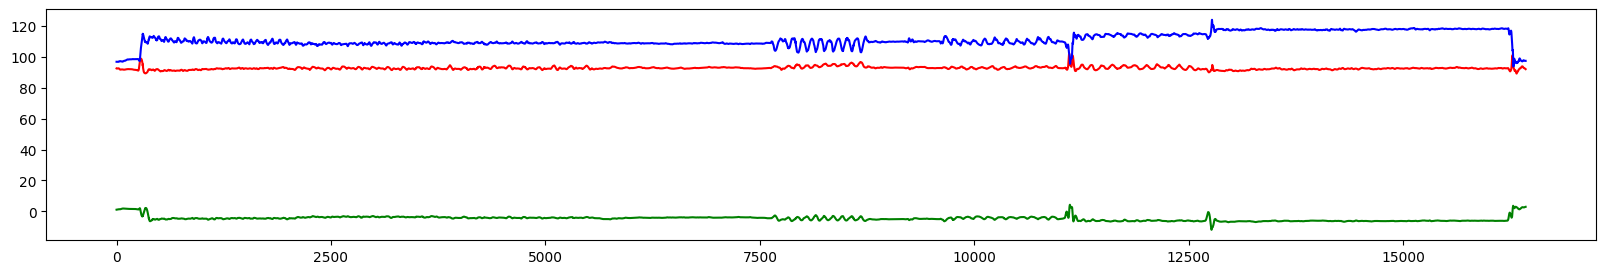

4


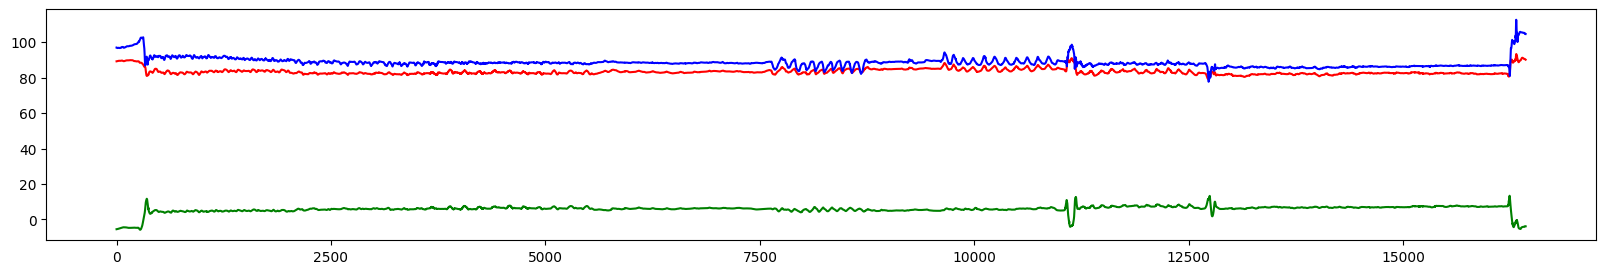

5


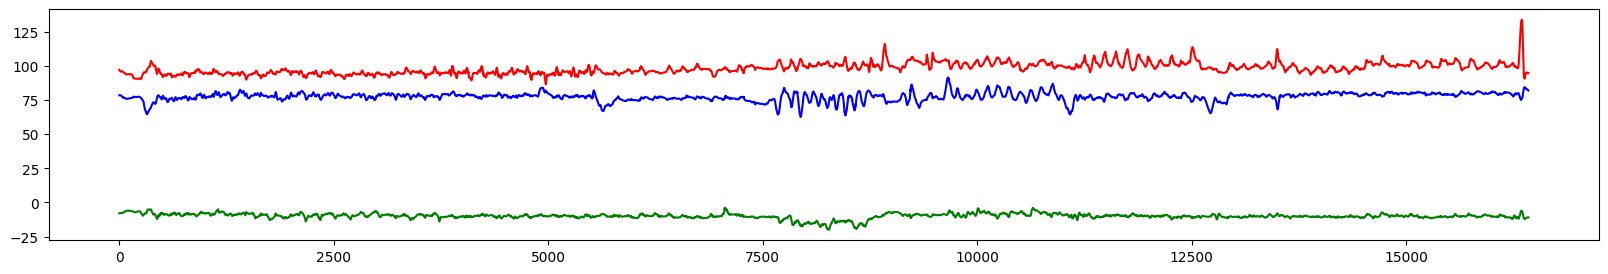

In [103]:
def sensor_show(data):
    euler = data['euler']
    acc = data['acc']
    show(euler)
    # show(acc)
    
for i, sensor in enumerate(sensors):
    print(i)
    sensor_show(sensor)

# Create Data

In [112]:
root = np.load('root.npy')
np.round(root, 2).reshape(38,3)

array([[ 0.  ,  0.  ,  0.95],
       [ 1.2 ,  1.22,  1.22],
       [ 0.02, -0.05, -0.06],
       [ 0.  ,  0.11,  0.  ],
       [-0.04, -0.04,  0.01],
       [-0.06,  0.03, -0.  ],
       [-0.04, -0.06,  0.  ],
       [ 0.06, -0.01, -0.  ],
       [ 0.08, -0.  , -0.37],
       [-0.11, -0.01, -1.11],
       [ 0.13, -0.14, -0.12],
       [-0.05,  0.08, -0.1 ],
       [ 0.15, -0.13,  0.16],
       [ 0.08, -0.  ,  0.37],
       [ 0.07,  0.18,  1.05],
       [ 0.12,  0.15,  0.12],
       [ 0.01,  0.1 ,  0.04],
       [-0.01, -0.07,  0.01],
       [ 0.03,  0.1 ,  0.05],
       [ 0.  ,  0.  ,  0.  ],
       [-0.22,  1.87,  0.07],
       [ 0.  , -0.  , -0.  ],
       [ 0.  ,  0.  ,  0.  ],
       [-0.  , -0.  ,  0.  ],
       [-0.  ,  0.  , -0.  ],
       [-0.  , -0.  ,  0.  ],
       [ 0.  , -0.  , -0.  ],
       [ 0.  , -0.  , -0.  ],
       [-0.  , -0.  , -0.  ],
       [ 0.  , -0.  , -0.  ],
       [-0.  ,  0.  , -0.  ],
       [ 0.  , -0.  ,  0.  ],
       [ 0.  , -0.  ,  0.  ],
       [ 0

In [39]:
root_rot = np.array([
    [0, 0, 1],
    [1, 0, 0],
    [0, 1, 0],
], dtype=np.float32
)

X_0 = np.zeros(72, dtype=np.float32)
for i in range(6):
    st = i*9
    end = st + 9
    X_0[st:end] = root_rot.reshape(9)
X_0

data = []
for i in range(120):
    data.append(X_0.copy())
    
    
pi = np.pi
N = 6*90
for i in range(N):
    euler_angles = np.radians([0, 0, -i/6])  # Convert to radians if they are in degrees
    # euler_angles = np.radians([0, -i/6, 0])
    # euler_angles = np.radians([-i/6, 0, 0])
    r = Rotation.from_euler('xyz', euler_angles)
    rotation_matrix = r.as_matrix()
    X_0[9:18] = rotation_matrix.dot(root_rot).reshape(9)
    
    # euler_angles = np.radians([0, 0, -i/6])
    # r = Rotation.from_euler('xyz', euler_angles)
    # rotation_matrix = r.as_matrix()
    # X_0[9:18] = rotation_matrix.dot(root_rot ).reshape(9)
    # X_0[27:36] = rotation_matrix.dot(root_rot ).reshape(9)
    
    
    # data.append(X_0.copy())
    

for i in range(120):
    data.append(X_0.copy())

for i in range(N):
    # euler_angles = np.radians([0, 0, -i/6])  # Convert to radians if they are in degrees
    euler_angles = np.radians([0, i/6, 0])
    # euler_angles = np.radians([-i/6, 0, 0])
    r = Rotation.from_euler('xyz', euler_angles)
    rotation_matrix = r.as_matrix()
    X_0[9:18] = rotation_matrix.dot(front).reshape(9)
    
    data.append(X_0.copy())
    

for i in range(120):
    data.append(X_0.copy())
    
np.save(
    file='../output/data.npy',
    arr=np.array(data)
)

In [82]:
Rotation.from_euler("xyz", np.array([90, 0, 0]))

In [20]:
front = Rotation.from_euler(
    'xyz', np.radians([0, 0, -90])
).as_matrix().dot(root_rot)
np.round(front)

array([[ 1.,  0.,  0.],
       [ 0.,  0., -1.],
       [ 0.,  1.,  0.]])

In [27]:
down = Rotation.from_euler(
    'xyz', np.radians([-45, 0, 0])
).as_matrix().dot(root_rot)
np.round(down)

array([[ 0.,  0.,  1.],
       [ 0.,  1.,  0.],
       [-1.,  0.,  0.]])

In [37]:
new_ = down.dot(
    Rotation.from_euler(
        'xyz', np.radians([0, -90, 0])
    ).as_matrix()
)
np.round(new_)

array([[ 1.,  0.,  0.],
       [ 0.,  1., -0.],
       [-0.,  0.,  1.]])

In [24]:
R = front.dot(np.linalg.inv(down))
Rot2Euler(R)

array([ 90.,   0., -90.])

In [16]:
front = np.array([
    [1, 0, 0],
    [0, 0, -1],
    [0, 1, 0]
])

down = np.array([
    [0, 0, 1],
    [0, 1, 0],
    [-1, 0, 0]
])

R = front.dot(np.linalg.inv(down))
Rot2Euler(R)

array([ 90.,   0., -90.])

In [40]:
Rot2Euler(root_rot)

array([90.,  0., 90.])

In [47]:

from fairmotion.ops import conversions

conversions.Q2A(np.array([0.0, 0.0, 0.0, 1.]))
# conversions.R2Q(np.eye(3))

array([0., 0., 0.])

# in live

In [120]:
root_rot = np.array([
    [0, 0, 1],
    [1, 0, 0],
    [0, 1, 0],
], dtype=np.float32
)
np.linalg.inv(root_rot)

array([[0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.]], dtype=float32)

In [ ]:
n_dofs = 57

s_init_T_pose = np.zeros(n_dofs * 2)
s_init_T_pose[2] = 0.85
s_init_T_pose[3:6] = np.array([1.20919958, 1.20919958, 1.20919958])

s_init_T_pose

In [10]:
import numpy as np
from fairmotion.ops import conversions

Rs_aligned_T_pose = np.array([
    1.0, 0, 0, 0, 0, -1, 0, 1, 0,
    1.0, 0, 0, 0, 0, -1, 0, 1, 0,
    1.0, 0, 0, 0, 0, -1, 0, 1, 0,
    1.0, 0, 0, 0, 0, -1, 0, 1, 0,
    1.0, 0, 0, 0, 0, -1, 0, 1, 0,
    1.0, 0, 0, 0, 0, -1, 0, 1, 0,
])
Rs_aligned_T_pose = Rs_aligned_T_pose.reshape((6, 3, 3))
Rs_aligned_T_pose = \
    np.einsum('ij,njk->nik', conversions.A2R(np.array([0, 0, np.pi/2])), Rs_aligned_T_pose)
    
np.round(Rs_aligned_T_pose, 3)

array([[[ 0.,  0.,  1.],
        [ 1.,  0., -0.],
        [ 0.,  1.,  0.]],

       [[ 0.,  0.,  1.],
        [ 1.,  0., -0.],
        [ 0.,  1.,  0.]],

       [[ 0.,  0.,  1.],
        [ 1.,  0., -0.],
        [ 0.,  1.,  0.]],

       [[ 0.,  0.,  1.],
        [ 1.,  0., -0.],
        [ 0.,  1.,  0.]],

       [[ 0.,  0.,  1.],
        [ 1.,  0., -0.],
        [ 0.,  1.,  0.]],

       [[ 0.,  0.,  1.],
        [ 1.,  0., -0.],
        [ 0.,  1.,  0.]]])

In [ ]:
# calibration: heading reset
R_and_acc_mean = get_mean_readings_3_sec()

# R_head = R_and_acc_mean[5*9: 6*9].reshape(3, 3)     # last sensor being head
R_Gn_Gp = R_and_acc_mean[:6*9].reshape((6, 3, 3))
# calibration: acceleration offset
acc_offset_Gp = R_and_acc_mean[6*9:].reshape(6, 3)      # sensor frame (S) and room frame (Gp) align during this

# calibration: bone-to-sensor transform
R_and_acc_mean = get_mean_readings_3_sec()

R_Gn_S0 = R_and_acc_mean[: 6 * 9].reshape((6, 3, 3))

R_Gp_B0 = Rs_aligned_T_pose
R_Gp_S0 = np.einsum('nij,njk->nik', R_Gn_Gp.transpose((0, 2, 1)), R_Gn_S0)
R_B0_S0 = np.einsum('nij,njk->nik', R_Gp_B0.transpose((0, 2, 1)), R_Gp_S0)

In [ ]:

def get_transformed_current_reading():
    R_and_acc_t = imu_set.current_reading.copy()

    R_Gn_St = R_and_acc_t[: 6*9].reshape((6, 3, 3))
    acc_St = R_and_acc_t[6*9:].reshape((6, 3))

    R_Gp_St = np.einsum('nij,njk->nik', R_Gn_Gp.transpose((0, 2, 1)), R_Gn_St)
    R_Gp_Bt = np.einsum('nij,njk->nik', R_Gp_St, R_B0_S0.transpose((0, 2, 1)))

    acc_Gp = np.einsum('ijk,ik->ij', R_Gp_St, acc_St)
    acc_Gp = acc_Gp - acc_offset_Gp

    acc_Gp = np.clip(acc_Gp, -MAX_ACC, MAX_ACC)

    return np.concatenate((R_Gp_Bt.reshape(-1), acc_Gp.reshape(-1)))

In [5]:
arr = np.array(range(54)).reshape(6, 3, 3)
arr.transpose((0, 2, 1))

array([[[ 0,  3,  6],
        [ 1,  4,  7],
        [ 2,  5,  8]],

       [[ 9, 12, 15],
        [10, 13, 16],
        [11, 14, 17]],

       [[18, 21, 24],
        [19, 22, 25],
        [20, 23, 26]],

       [[27, 30, 33],
        [28, 31, 34],
        [29, 32, 35]],

       [[36, 39, 42],
        [37, 40, 43],
        [38, 41, 44]],

       [[45, 48, 51],
        [46, 49, 52],
        [47, 50, 53]]])

In [7]:
root_rot = np.array([
    [0, 0, 1],
    [1, 0, 0],
    [0, 1, 0],
], dtype=np.float32
)
root_rot

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.]], dtype=float32)

In [9]:
root_rot.transpose().dot(root_rot)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]], dtype=float32)

# Old

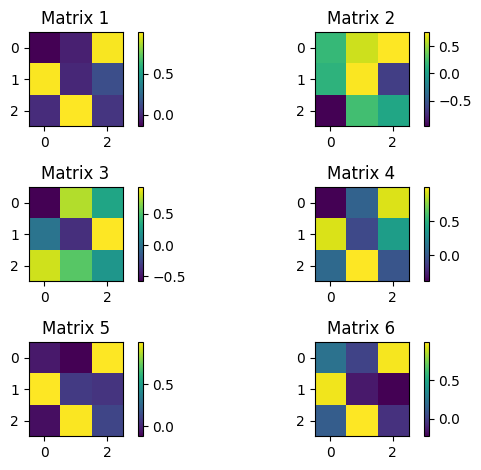

In [4]:
frame = imu[500]
rot = frame[:54].reshape((6, 3, 3))
acc = frame[54:].reshape((6, 3))

for i, matrix in enumerate(rot):
    plt.subplot(3, 2, i + 1)
    plt.imshow(matrix, cmap='viridis')
    plt.title(f"Matrix {i + 1}")
    plt.colorbar()

plt.tight_layout()
plt.show()

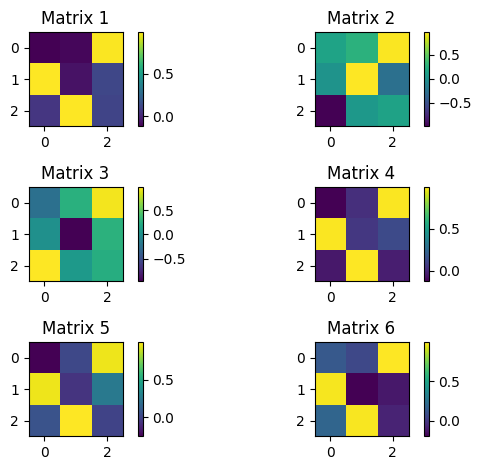

In [15]:
for i, matrix in enumerate(rot):
    plt.subplot(3, 2, i + 1)
    plt.imshow(matrix, cmap='viridis')
    plt.title(f"Matrix {i + 1}")
    plt.colorbar()

plt.tight_layout()
plt.show()

In [10]:
import numpy as np
a = np.array(range(54))
a.reshape((6, 3, 3))

array([[[ 0,  1,  2],
        [ 3,  4,  5],
        [ 6,  7,  8]],

       [[ 9, 10, 11],
        [12, 13, 14],
        [15, 16, 17]],

       [[18, 19, 20],
        [21, 22, 23],
        [24, 25, 26]],

       [[27, 28, 29],
        [30, 31, 32],
        [33, 34, 35]],

       [[36, 37, 38],
        [39, 40, 41],
        [42, 43, 44]],

       [[45, 46, 47],
        [48, 49, 50],
        [51, 52, 53]]])